In [1]:
from data_generator import *
from UNet import *
from tensorflow.keras.optimizers import *
from utils import *

C:\Users\28347\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\28347\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\28347\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\28347\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
model = get_UNet_model((528, 704))

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 528, 704, 1)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 264, 352, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 264, 352, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 264, 352, 32) 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
separable_

In [5]:
img = cv2.resize(cv2.cvtColor(cv2.imread('./test/7ae19de7bc2a.png'), cv2.COLOR_BGR2GRAY), (528, 704)).reshape((528, 704, 1))

In [6]:
model.predict(img)

ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (528, 704, 1)

Unet For Cort

In [2]:
cell_type = "cort"
train_size = 300
test_size = 20
train_batch_size = 10
val_batch_size = 10
epochs = 5
image_size = (512, 512)
root_path = "/content/drive/My Drive/train_reorganize/"

In [4]:
image_path = os.path.join(root_path, cell_type)
annotation_path = os.path.join(root_path, "annotation", cell_type)

X_train, y_train, X_test, y_test = train_test_split(image_path, annotation_path, train_size, test_size)
train_generator = DataGeneratorWithAnnotation(train_batch_size, image_size, X_train, y_train)
val_generator = DataGeneratorWithAnnotation(val_batch_size, image_size, X_test, y_test)

model = get_UNet_model(image_size)

model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(os.path.join("/content/drive/My Drive/", "UNet-" + cell_type + ".h5"), save_best_only=True)
]

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)

Epoch 1/5
30/30 [==============================] - ETA: 0s - loss: 0.2700 - accuracy: 0.9359

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


30/30 [==============================] - 174s 4s/step - loss: 0.2700 - accuracy: 0.9359 - val_loss: 0.2814 - val_accuracy: 0.9716
Epoch 2/5
30/30 [==============================] - 37s 1s/step - loss: 0.0960 - accuracy: 0.9746 - val_loss: 0.1871 - val_accuracy: 0.9732
Epoch 3/5
30/30 [==============================] - 36s 1s/step - loss: 0.0792 - accuracy: 0.9759 - val_loss: 0.1886 - val_accuracy: 0.9760
Epoch 4/5
30/30 [==============================] - 37s 1s/step - loss: 0.0678 - accuracy: 0.9779 - val_loss: 0.2208 - val_accuracy: 0.9771
Epoch 5/5
30/30 [==============================] - 36s 1s/step - loss: 0.0626 - accuracy: 0.9786 - val_loss: 0.2660 - val_accuracy: 0.9771


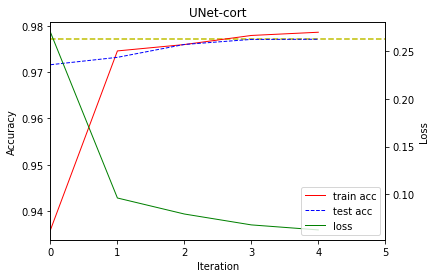

In [5]:
train_history_plot(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], "UNet-" + cell_type, 0.9771)

UNet for shsy5y

In [6]:
cell_type = "shsy5y"
train_size = 140
test_size = 15
train_batch_size = 10
val_batch_size = 5

In [7]:
image_path = os.path.join(root_path, cell_type)
annotation_path = os.path.join(root_path, "annotation", cell_type)

X_train, y_train, X_test, y_test = train_test_split(image_path, annotation_path, train_size, test_size)
train_generator = DataGeneratorWithAnnotation(train_batch_size, image_size, X_train, y_train)
val_generator = DataGeneratorWithAnnotation(val_batch_size, image_size, X_test, y_test)

model = get_UNet_model(image_size)

model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(os.path.join("/content/drive/My Drive/", "UNet-" + cell_type + ".h5"), save_best_only=True)
]

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)

Epoch 1/5
14/14 [==============================] - ETA: 0s - loss: 1.2991 - accuracy: 0.7127

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


14/14 [==============================] - 68s 5s/step - loss: 1.2991 - accuracy: 0.7127 - val_loss: 8.9246 - val_accuracy: 0.1987
Epoch 2/5
14/14 [==============================] - 17s 1s/step - loss: 0.7403 - accuracy: 0.7864 - val_loss: 15.7684 - val_accuracy: 0.1971
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.5628 - accuracy: 0.7947 - val_loss: 3.7837 - val_accuracy: 0.2059
Epoch 4/5
14/14 [==============================] - 18s 1s/step - loss: 0.4772 - accuracy: 0.8036 - val_loss: 2.1734 - val_accuracy: 0.2167
Epoch 5/5
14/14 [==============================] - 18s 1s/step - loss: 0.4459 - accuracy: 0.8117 - val_loss: 1.6612 - val_accuracy: 0.2282


UNet for astro

In [8]:
cell_type = "astro"
train_size = 120
test_size = 11
train_batch_size = 10
val_batch_size = 1

In [9]:
image_path = os.path.join(root_path, cell_type)
annotation_path = os.path.join(root_path, "annotation", cell_type)

X_train, y_train, X_test, y_test = train_test_split(image_path, annotation_path, train_size, test_size)
train_generator = DataGeneratorWithAnnotation(train_batch_size, image_size, X_train, y_train)
val_generator = DataGeneratorWithAnnotation(val_batch_size, image_size, X_test, y_test)

model = get_UNet_model(image_size)

model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(os.path.join("/content/drive/My Drive/", "UNet-" + cell_type + ".h5"), save_best_only=True)
]

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=callbacks)

Epoch 1/5
12/12 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.7804

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


12/12 [==============================] - 56s 4s/step - loss: 0.7388 - accuracy: 0.7804 - val_loss: 1.9760 - val_accuracy: 0.2917
Epoch 2/5
12/12 [==============================] - 15s 1s/step - loss: 0.4526 - accuracy: 0.8331 - val_loss: 2.9708 - val_accuracy: 0.2606
Epoch 3/5
12/12 [==============================] - 16s 1s/step - loss: 0.3709 - accuracy: 0.8381 - val_loss: 1.5264 - val_accuracy: 0.2749
Epoch 4/5
12/12 [==============================] - 16s 1s/step - loss: 0.3431 - accuracy: 0.8435 - val_loss: 0.6683 - val_accuracy: 0.6998
Epoch 5/5
12/12 [==============================] - 15s 1s/step - loss: 0.3269 - accuracy: 0.8500 - val_loss: 1.0596 - val_accuracy: 0.2810
